# model_test

In [15]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

from utils import get_data, model_test, submit_fun
from sklearn.model_selection import train_test_split
X, y, X_pred= get_data(fillna='predict', box_cox=True, split=False, 
                       verbose=True, random_state=520)
X_train, X_test, y_train, y_test = \
    train_test_split(X,y, test_size=50000, random_state=520)

get_data(fillna=predict, box_cox=True, verbose=True, scale=True, random_state=520)
fillna = 'predict'
Fitting NA data...
Predit Accuracy:
   bodyType 0.6961 %
   fuelType 0.9121 %
   gearbox 0.8361 %
Preditting NA data...
Done!

Y_data had been applied box-cox transform!!!
Use [np.exp(y_pred)] to inverse transform!!!


## decision_tree

test MAE: 847.0811806653923
train MAE: 341.462474439024


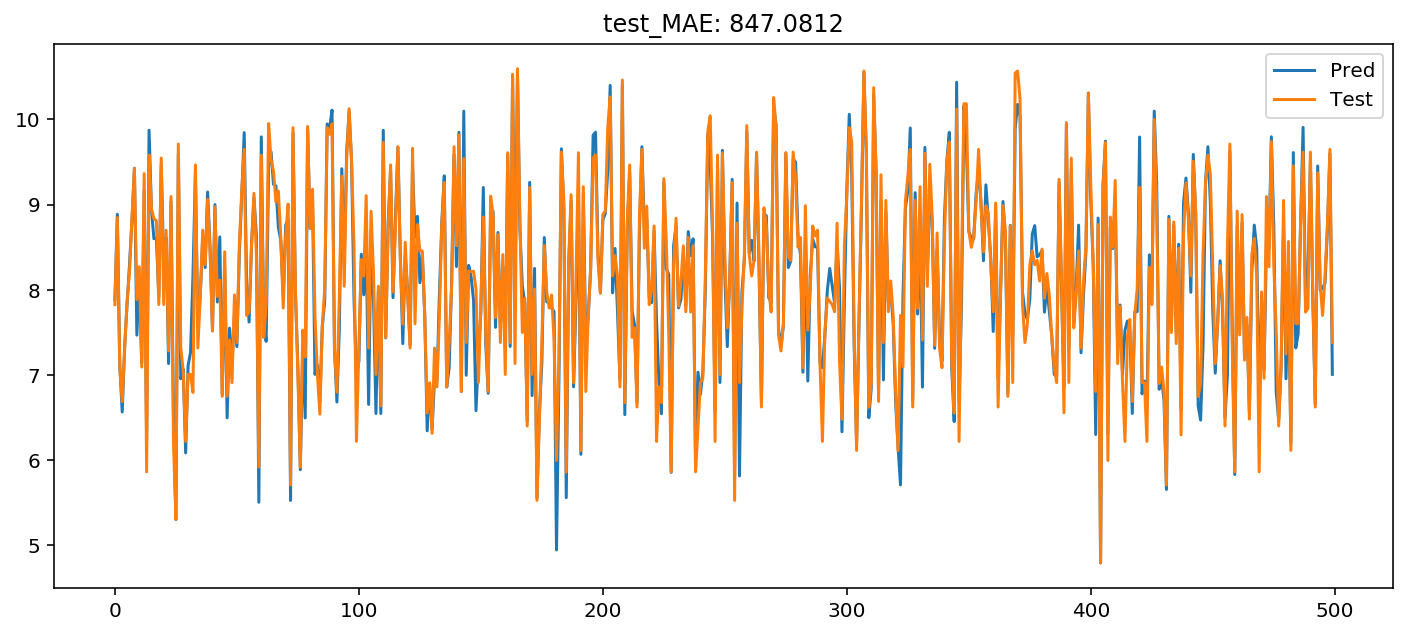

In [3]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(max_depth=13)
test_score, train_score, y_pred = \
model_test(estimator, X_train, X_test, y_train, y_test,
return_train_score=True, plot_predict=True)
print('test MAE:', test_score)x
print('train MAE:', train_score)

## GBRT

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBRT = GradientBoostingRegressor(n_estimators=30, 
                                 criterion='mae', 
                                 max_depth=4,
                                 verbose=1)
test_score, train_score, y_pred = \
model_test(GBRT, X_train, X_test, y_train, y_test,
return_train_score=True, plot_predict=True)
print('test MAE:', test_score)
print('train MAE:', train_score)

      Iter       Train Loss   Remaining Time 
         1           1.0925         1864.52m
         2           0.9112         1396.34m
         3           0.7631         1271.84m
         4           0.6404         1184.93m
         5           0.5411         1118.47m
         6           0.4616         1058.96m
         7           0.3952         1007.07m
         8           0.3420          963.64m
         9           0.2976          916.37m
        10           0.2620          866.69m


## XGBoost

[00:35:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
test MAE: 550.6705933265686
train MAE: 153.30371337667125


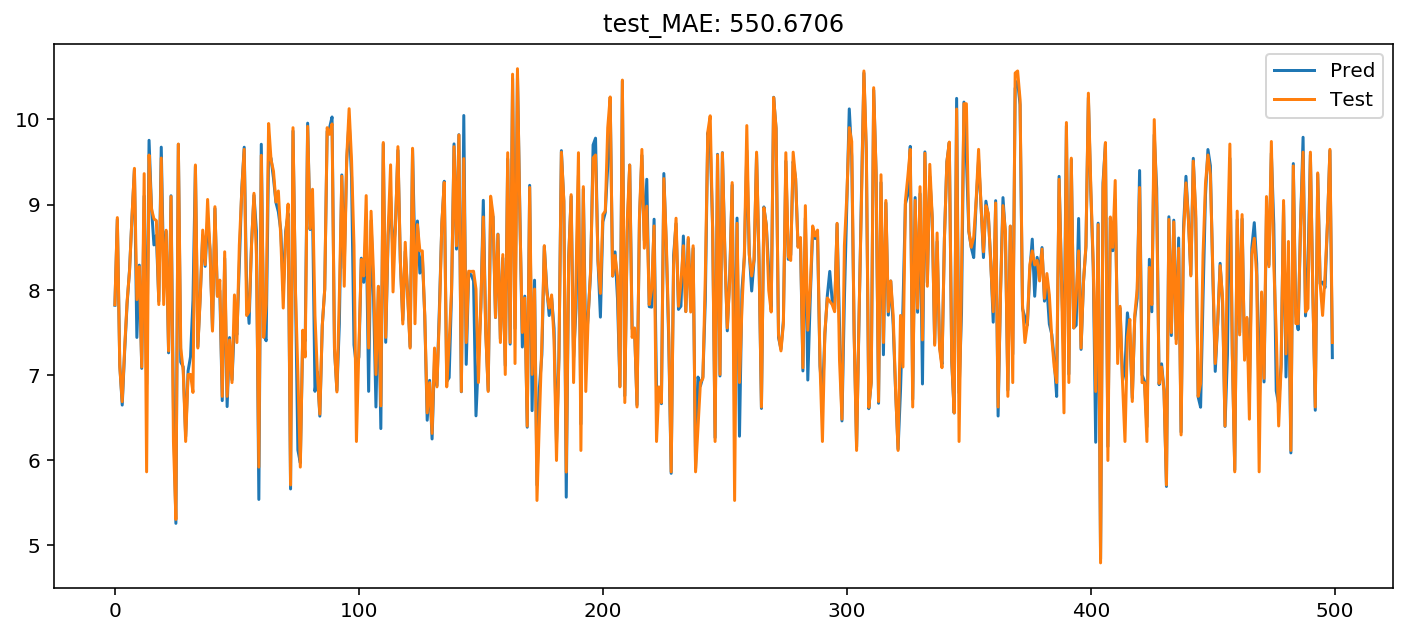

In [9]:
from xgboost.sklearn import XGBRegressor
XGBoost = XGBRegressor(max_depth=13, n_estimators=100, learning_rate=0.1, 
                       min_child_weight=1, n_jobs=4, verbosity=1)
test_score, train_score, y_pred = \
model_test(XGBoost, X_train, X_test, y_train, y_test,
return_train_score=True, plot_predict=True)
print('test MAE:', test_score)
print('train MAE:', train_score)

In [11]:
submit_fun(XGBoost, X_pred)

Saved in /Users/apple/Documents/Python/TianChi/Car_Price/


# model_test_cv

In [12]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

from utils import get_data, model_test_cv
X, y, X_pred= get_data(fillna='predict', box_cox=True, split=False, 
                       verbose=True, random_state=520)

from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(max_depth=13)
mean_test_score, mean_train_score = model_test_cv(estimator, X, y , verbose_eval=1, 
                                                  cv=3, return_train_score=True)
print('mean_test_score', mean_test_score)
print('mean_train_score', mean_train_score)

get_data(fillna=predict, box_cox=True, verbose=True, scale=True, random_state=520)
fillna = 'predict'
Fitting NA data...
Predit Accuracy:
   bodyType 0.728 %
   fuelType 0.9262 %
   gearbox 0.863 %
Preditting NA data...
Done!

Y_data had been applied box-cox transform!!!
Use [np.exp(y_pred)] to inverse transform!!!


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


mean_test_score 937.8258735758603
mean_train_score 327.1283316685772


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.4s finished


## decision_tree

In [19]:
from tqdm.notebook import tqdm as tqdm
test_score = []
train_score = []
for max_depth in tqdm(range(5,20)):
    estimator = DecisionTreeRegressor(max_depth=max_depth)
    mean_test_score, mean_train_score = \
    model_test_cv(estimator, X, y , cv=3, 
                  verbose_eval=0, 
                  return_train_score=True)
    test_score.append(mean_test_score)
    train_score.append(mean_train_score)

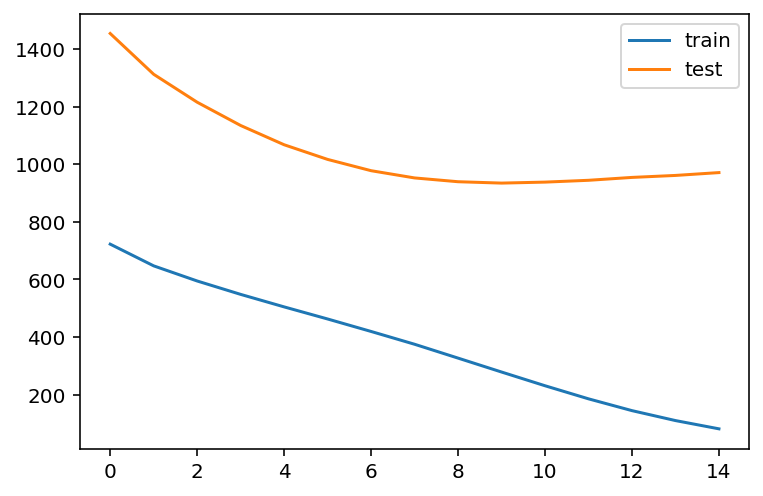

In [20]:
pd.DataFrame({'train': train_score,'test': test_score}).plot()